In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print(xtrain.shape)#getting the fashion dataset from tensor flow
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

4423680/4422102 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']#declaring the names in column_name from the dataset

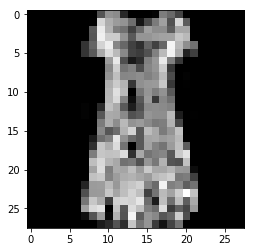

In [5]:
plt.imshow(xtrain[22000],cmap='gray')
plt.show()

In [6]:
class_names[ytrain[22000]]

'Dress'

In [8]:
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
from tensorflow.keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


# Convolutional neural network

In [11]:
from tensorflow.keras import models,layers

In [16]:
#initialize CNN
model=models.Sequential()

#add first convolutional layer
model.add(layers.Conv2D(filters=10,kernel_size=(3,3),input_shape=(28,28,1),
                       activation='relu'))
model.add(layers.Conv2D(filters=20,kernel_size=(3,3),input_shape=(28,28,1),
                       activation='relu'))
#adding a pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#add a flatten layer to shift classification problem
model.add(layers.Flatten())

#add a hidden layer with 100 neurons
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(120,activation='relu'))
#add a output layer
model.add(layers.Dense(10,activation='softmax'))

In [17]:
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#train
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 484us/sample - loss: 3.5708 - accuracy: 0.6793 - val_loss: 0.5624 - val_accuracy: 0.8126
Epoch 2/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.4420 - accuracy: 0.8477 - val_loss: 0.4329 - val_accuracy: 0.8547
Epoch 3/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.3387 - accuracy: 0.8802 - val_loss: 0.3751 - val_accuracy: 0.8679
Epoch 4/10
60000/60000 [==============================] - 28s 474us/sample - loss: 0.2815 - accuracy: 0.9001 - val_loss: 0.3591 - val_accuracy: 0.8721
Epoch 5/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.2452 - accuracy: 0.9111 - val_loss: 0.3499 - val_accuracy: 0.8765
Epoch 6/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2091 - accuracy: 0.9250 - val_loss: 0.3285 - val_accuracy: 0.8864
Epoch 7/10
60000/60000 [====================